# Example Notebook for XPCS 1-time at CSX-1

In [1]:
import numpy as np
from databroker import DataBroker, get_table
from csxtools.utils import get_fastccd_images
from csxtools.ipynb import image_stack_to_movie, show_image_stack
%matplotlib notebook
from matplotlib import pyplot as plt
import skbeam.core.correlation as corr
import skbeam.core.roi as roi

## Data files

Specify here the background and real data files. 

In [2]:
bgnd8 = DataBroker['ce5042b7-00ae-49ca-9b11-b10c5661aaaa'] #[52440]
bgnd2 = None # DataBroker['ce5042b7-00ae-49ca-9b11-b10c5661aaaa'] #[52440]
bgnd1 = None # DataBroker['ce5042b7-00ae-49ca-9b11-b10c5661aaaa'] #[52440]
data = DataBroker['b2596f8e-d220-4aea-8a55-8ccb17cbdacc'] #[52436]

In [35]:
stack = get_fastccd_images(data, (bgnd8, bgnd2, bgnd1), tag='fccd_image_lightfield')
images = stack[0]

## Show the converted stack using the widgets

<IPython.core.display.Javascript object>


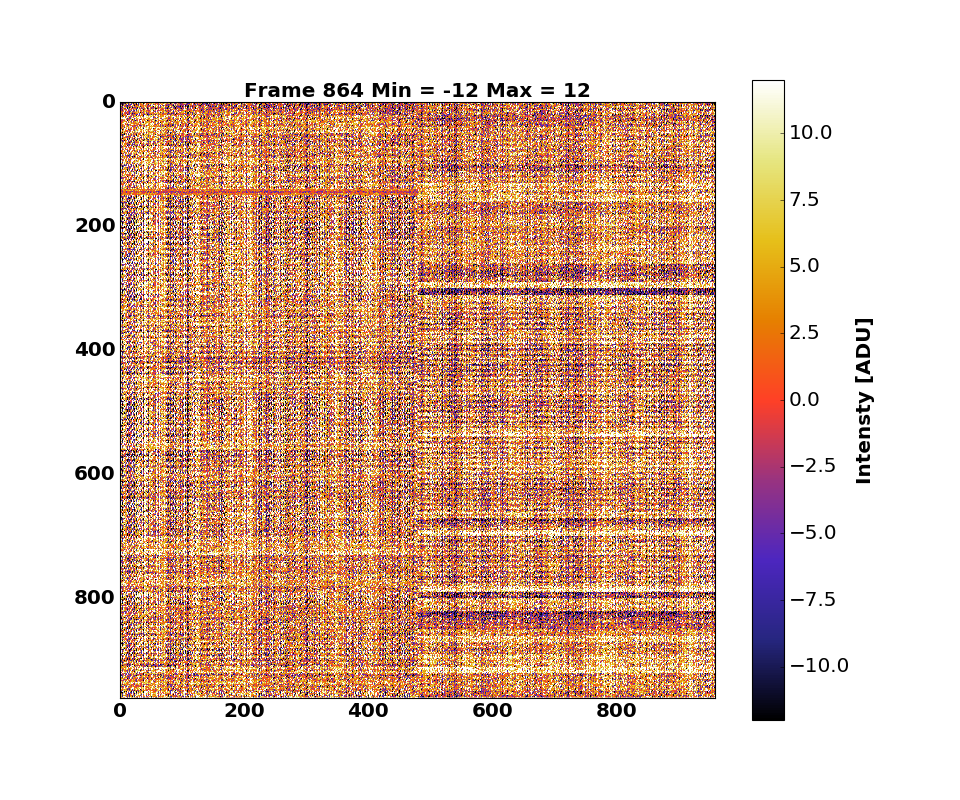

In [36]:
show_image_stack(images, minmax=(-20, 20))

In [71]:
rois = roi.rectangles([(20,20,100,100), (20, 120, 100,100), (20, 320, 100, 100)], shape=(960,960))
rois += roi.rings([(50, 100)], (500,700), shape=(960,960)) + (rois.max() + 1)

<IPython.core.display.Javascript object>


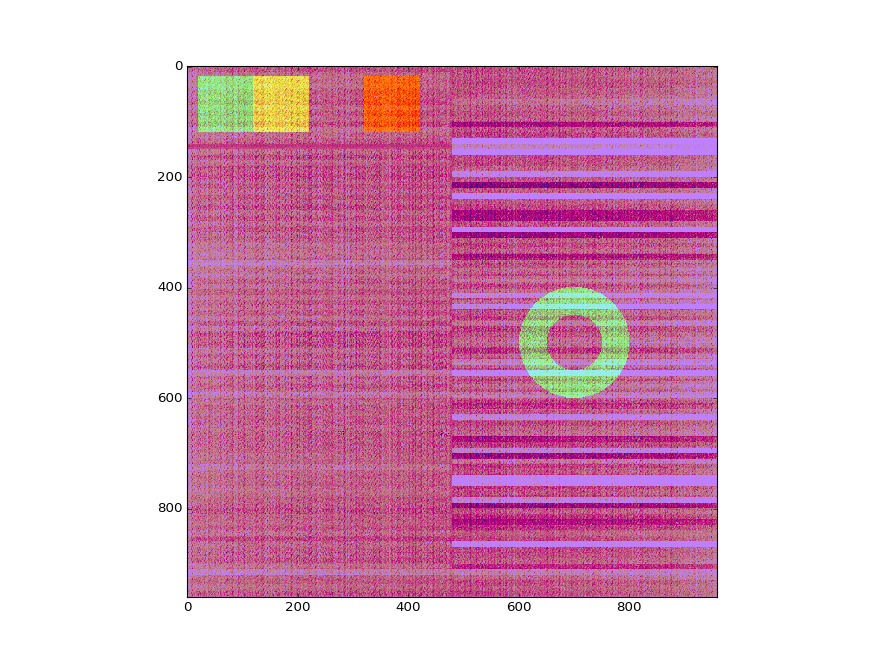

In [69]:
fix, axes = plt.subplots(1)
axes.imshow(images[0], vmin=-30, vmax=30, interpolation='None', cmap='hot')
tmp = np.array(rois, dtype='float')
tmp[rois==0] = np.nan
axes.imshow(tmp, cmap='rainbow', interpolation='nearest', alpha=.5,)

In [42]:
num_levels = 10
num_bufs = 50

In [43]:
g2, lag_steps = corr.multi_tau_auto_corr(
    num_levels, num_bufs, rois, (im for im in stack[0]))

<IPython.core.display.Javascript object>


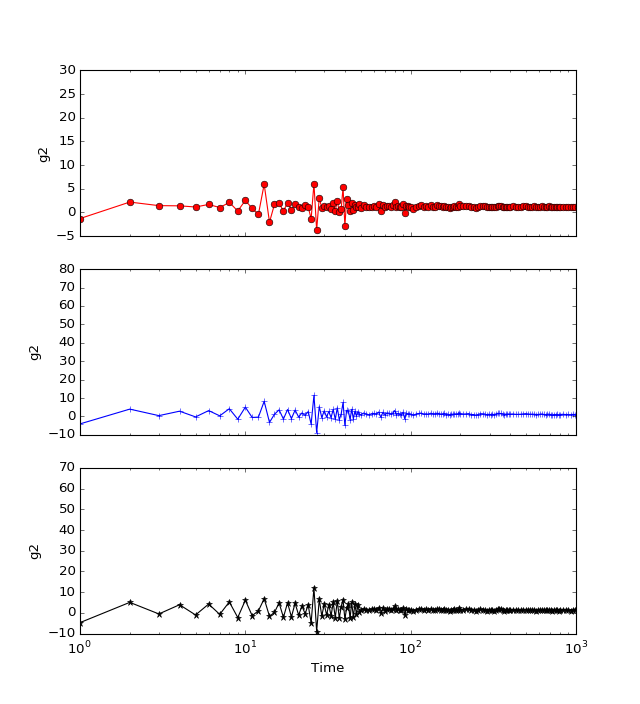

(1, 1000.0)

In [78]:
fig, axes = plt.subplots(3, sharex=True)
for ax, fmt, g in zip(axes, ['ro-', 'b+-', 'k*-'], g2.T):
    ax.semilogx(lag_steps, g, fmt)
    ax.set_ylabel('g2')
    
axes[-1].set_xlabel('Time')
axes[-1].set_xlim((1, 1e3))

In [9]:
import csxtools
csxtools.__version__

'0.1.4+1.g74a2cb3'

In [10]:
import databroker
databroker.__version__

'0.3.1'